# Evaluation of OpenVLA Model on LIBERO Dataset

This notebook evaluates the process of using the OpenVLA model on one task from the LIBERO dataset. The following steps are performed:

1. **Setup and Imports**: Import necessary libraries and set up the environment.
2. **Load Processor and Model**: Load the OpenVLA processor and model from HuggingFace.
3. **Load LIBERO Dataset Configuration**: Load the configuration for the LIBERO dataset.
4. **Prepare Datasets**: Prepare datasets from the LIBERO benchmark.
5. **Extract Sample Data and Process Inputs**: Extract a sample image and instruction from the LIBERO dataset, process the inputs using the OpenVLA processor, visualize the raw RGB image, print the raw instruction and formatted prompt, print the size of the processed input tensors, and print the OpenVLA model outputs for each step.

By running these sections sequentially, we can evaluate the whole process for one task from the LIBERO dataset, visualize the raw RGB image, print the instructions and prompts, show the input tensor sizes, and print the OpenVLA model outputs for each step.


Section 1: Setup and Imports

In [1]:
import os
import sys

# Add VLA_DIR to PYTHONPATH
sys.path.append(os.path.abspath(os.path.join(os.path.dirname('__file__'), '../')))

# Add LIBERO to PYTHONPATH
sys.path.append(os.path.abspath(os.path.join(os.path.dirname('__file__'), '../external/LIBERO')))

import yaml
import torch
import matplotlib.pyplot as plt
from PIL import Image
from easydict import EasyDict
from transformers import AutoModelForVision2Seq, AutoProcessor
from libero.libero import benchmark, get_libero_path
from utils.LIBERO_utils import get_task_names, extract_task_info

/data/zhaoyu/anaconda3/envs/VLA_CL/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Section 2: Load Processor and Model

In [ ]:
# Load Processor & VLA
processor = AutoProcessor.from_pretrained("openvla/openvla-7b", trust_remote_code=True)
vla = AutoModelForVision2Seq.from_pretrained(
    "openvla/openvla-7b",
    torch_dtype=torch.bfloat16,
    low_cpu_mem_usage=True,
    trust_remote_code=True
).to("cuda:1")

Section 3: Load LIBERO Demonstration Data

In [4]:
# Check dataset path
BENCHMARK_PATH = get_libero_path("benchmark_root")
DATASET_BASE_PATH = get_libero_path("datasets")
print("Default benchmark root path: ", BENCHMARK_PATH)
print("Default dataset root path: ", DATASET_BASE_PATH)

# Select a dataset
DATASET_NAME = "libero_10"
FILTER_KEY = None  # Set filter key if needed, e.g., "valid" for validation
VERBOSE = True
dataset_path_demo = os.path.join(DATASET_BASE_PATH, DATASET_NAME)
print(f"Dataset path: {dataset_path_demo}")

# Load dataset
# use a dictionary to store demonstration data for each task
demonstration_data = {}
# get all task names in the dataset
task_names_demo = get_task_names(dataset_path_demo)
# get demonstration data for each task

# for task_name_demo in task_names_demo:
#     print(f"Loading demonstration data for task: {task_name_demo}")
#     [language_instruction, actions_batch, images_batch] = extract_task_info(dataset_path_demo, task_name, filter_key=FILTER_KEY, verbose=VERBOSE)
#     demonstration_data[task_name_demo] = [language_instruction, actions_batch, images_batch]

Default benchmark root path:  /home/zhaoyu/Workspace/VLA-Continual-Learning/external/LIBERO/libero/libero
Default dataset root path:  /data2/zhaoyu/LIBERO_dataset/datasets
Dataset path: /data2/zhaoyu/LIBERO_dataset/datasets/libero_10


Section 4: Train OpenVLA on LIBERO

In [ ]:
# TODO

Section 5: Evaluate OpenVLA on Trained LIBERO Dataset

env: MUJOCO_GL=osmesa
[info] using task orders [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Task names for evaluation: ['LIVING_ROOM_SCENE2_put_both_the_alphabet_soup_and_the_tomato_sauce_in_the_basket', 'LIVING_ROOM_SCENE2_put_both_the_cream_cheese_box_and_the_butter_in_the_basket', 'KITCHEN_SCENE3_turn_on_the_stove_and_put_the_moka_pot_on_it', 'KITCHEN_SCENE4_put_the_black_bowl_in_the_bottom_drawer_of_the_cabinet_and_close_it', 'LIVING_ROOM_SCENE5_put_the_white_mug_on_the_left_plate_and_put_the_yellow_and_white_mug_on_the_right_plate', 'STUDY_SCENE1_pick_up_the_book_and_place_it_in_the_back_compartment_of_the_caddy', 'LIVING_ROOM_SCENE6_put_the_white_mug_on_the_plate_and_put_the_chocolate_pudding_to_the_right_of_the_plate', 'LIVING_ROOM_SCENE1_put_both_the_alphabet_soup_and_the_cream_cheese_box_in_the_basket', 'KITCHEN_SCENE8_put_both_moka_pots_on_the_stove', 'KITCHEN_SCENE6_put_the_yellow_and_white_mug_in_the_microwave_and_close_it']


/data/zhaoyu/anaconda3/envs/VLA_CL/lib/python3.8/site-packages/numba/np/arraymath.py:3845: DeprecationWarning: `np.MachAr` is deprecated (NumPy 1.22).
  @overload(np.MachAr)
/data/zhaoyu/anaconda3/envs/VLA_CL/lib/python3.8/site-packages/numba/np/arraymath.py:3845: DeprecationWarning: `np.MachAr` is deprecated (NumPy 1.22).
  @overload(np.MachAr)
/data/zhaoyu/anaconda3/envs/VLA_CL/lib/python3.8/site-packages/numba/np/arraymath.py:3845: DeprecationWarning: `np.MachAr` is deprecated (NumPy 1.22).
  @overload(np.MachAr)


Initial RGB observations:


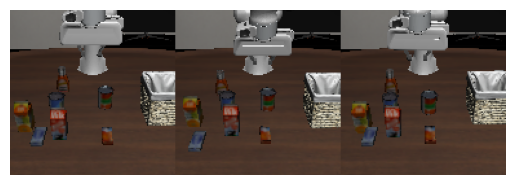

RGB observations after 5 steps:


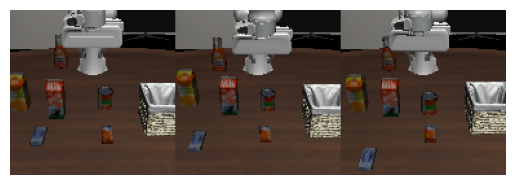

In [7]:
%env MUJOCO_GL=osmesa
import time
import numpy as np
import random
from libero.libero.utils.time_utils import Timer
from libero.libero.utils.video_utils import VideoWriter
from utils.LIBERO_utils import get_task_names, extract_task_info, extract_env_obs
from libero.lifelong.metric import (
    evaluate_loss,
    evaluate_success,
    raw_obs_to_tensor_obs,
)
from libero.lifelong.utils import (
    control_seed,
    safe_device,
    torch_load_model,
    NpEncoder,
    compute_flops,
)
from libero.libero.envs import OffScreenRenderEnv, SubprocVectorEnv
import matplotlib.pyplot as plt



BDDL_FILES_BASE_PATH = get_libero_path("bddl_files")
INIT_STATES_BASE_PATH = get_libero_path("init_states")
VIDEO_FOLDER = "../videos"
SAVE_VIDEO = False

EVAL_MAX_STEP = 500
DEVICE_ID = 2

# Load evaluation dataset
# task_names_demo = list(demonstration_data.keys())
benchmark_dict = benchmark.get_benchmark_dict()
benchmark_instance = benchmark_dict[DATASET_NAME]()
# num_tasks_eval = benchmark_instance.get_num_tasks()
task_names_eval = benchmark_instance.get_task_names()
print(f"Task names for evaluation: {task_names_eval}")
# print(f"Task name for training: {task_names_demo}")

# Evaluate the model
task_id = 2
task = benchmark_instance.get_task(task_id)

with Timer() as t, VideoWriter(VIDEO_FOLDER, SAVE_VIDEO) as video_writer:
    env_args = {
        "bddl_file_name": os.path.join(
            BDDL_FILES_BASE_PATH, task.problem_folder, task.bddl_file
        ),
        "render_gpu_device_id": DEVICE_ID
    }

    env_num = 3
    env = SubprocVectorEnv(
        [lambda: OffScreenRenderEnv(**env_args) for _ in range(env_num)]
    )
        
    env.reset()
    env.seed(random.randint(0, 1000))

    init_states_path = os.path.join(
        INIT_STATES_BASE_PATH, task.problem_folder, task.init_states_file
    )
    init_states = torch.load(init_states_path)
    indices = np.arange(env_num) % init_states.shape[0]
    init_states_ = init_states[indices]

    dones = [False] * env_num
    steps = 0
    obs = env.set_init_state(init_states_)
    print("Initial RGB observations:")
    stacked_image = np.hstack([obs[k]["agentview_image"][::-1] for k in range(env_num)])
    plt.imshow(stacked_image)
    plt.axis('off')
    plt.show()

    num_success = 0
    for _ in range(5):  # simulate the physics without any actions
        obs, reward, done, info = env.step(np.zeros((env_num, 7)))
        
    print("RGB observations after 5 steps:")
    stacked_image = np.hstack([obs[k]["agentview_image"][::-1] for k in range(env_num)])
    plt.imshow(stacked_image)
    plt.axis('off')
    plt.show()

#     with torch.no_grad():
#         while steps < EVAL_MAX_STEP:
#             steps += 1

#             # get current observation
            
#             data = extract_env_obs(obs, DEVICE_ID)
#             print(data)
#             input("PAUSE")
#             # actions = algo.policy.get_action(data)
#             obs, reward, done, info = env.step(actions)
#             video_writer.append_vector_obs(
#                 obs, dones, camera_name="agentview_image"
#             )

#             # check whether succeed
#             for k in range(env_num):
#                 dones[k] = dones[k] or done[k]
#             if all(dones):
#                 break

#         for k in range(env_num):
#             num_success += int(dones[k])

#     success_rate = num_success / env_num
#     env.close()

#     eval_stats = {
#         "loss": test_loss,
#         "success_rate": success_rate,
#     }

#     os.system(f"mkdir -p {args.save_dir}")
#     torch.save(eval_stats, save_folder)
# print(
#     f"[info] finish for ckpt at {run_folder} in {t.get_elapsed_time()} sec for rollouts"
# )
# print(f"Results are saved at {save_folder}")
# print(test_loss, success_rate)
